In [3]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [5]:
dir = "/home/vishu/data/hbmep-processed/human/tms"
src = os.path.join(dir, "proc_2023-11-28.npy")
mat = np.load(src)

src = os.path.join(dir, "proc_2023-11-28.csv")
df = pd.read_csv(src)

print(mat.shape)
print(df.shape)



(1415, 1501, 6)
(1415, 119)


In [6]:
subset = [("SCA01")]

In [9]:
ind = df["participant"] == "SCA01"
df = df[ind].reset_index(drop=True).copy()
mat = mat[ind, ...]


In [11]:
intensity = df["TMSInt"].values
mep_matrix = mat[..., 1]

print(intensity.shape, type(intensity), intensity.dtype)
print(mep_matrix.shape, type(mep_matrix), mep_matrix.dtype)


(78,) <class 'numpy.ndarray'> float64
(78, 1501) <class 'numpy.ndarray'> float64


(1501,)
(1501,)
()
880.9176817159428


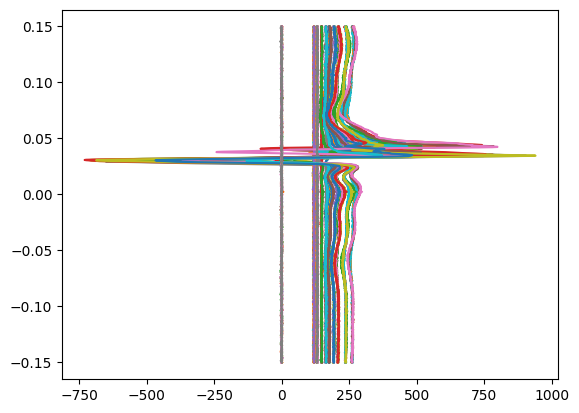

In [16]:
fig, axes = plt.subplots(1, 1, squeeze=False)
ax = axes[0, 0]

mep_window = [-0.15, 0.15]
time = np.linspace(*mep_window, mep_matrix.shape[1])
print(time.shape)

mep_size_window = [0.015, 0.075]
within_mep_size_window = (time > mep_size_window[0]) & (time < mep_size_window[1])
print(within_mep_size_window.shape)

max_amplitude = mep_matrix[..., within_mep_size_window].max()
print(max_amplitude.shape)
print(max_amplitude)



for i in range(mep_matrix.shape[0]):
    x = mep_matrix[i, :]
    x += intensity[i]
    ax.plot(x, time)
